## Load dataset

In [1]:
from sklearn.datasets import make_blobs

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

In [3]:
X.shape

(750, 2)

In [4]:
y.shape

(750,)

## Feature Scaling

In [5]:
from sklearn import preprocessing

In [6]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

## 1/ Clusterize

effectuer un partitionnement de X en 10 clusters, avec l’algorithme de clustering de votre choix

In [7]:
from sklearn import cluster

In [8]:
hc = cluster.AgglomerativeClustering(n_clusters=3)
hc.fit(X_scaled)
clusters = hc.labels_

In [9]:
clusters

array([2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 0,
       0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1,
       0, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1,
       1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1,
       1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0,
       0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0,
       0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2,

## 2/ Evaluate

In [13]:
from sklearn import metrics 

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_} / {len(y)}")
print(f"Homogeneity: {metrics.homogeneity_score(y, clusters):0.3f}")
print(f"Completeness: {metrics.completeness_score(y, clusters):0.3f}")
print(f"V-measure: {metrics.v_measure_score(y, clusters):0.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, clusters):0.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, clusters):0.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, clusters):0.3f}")
print(f"David Bouldin Score: {metrics.davies_bouldin_score(X, clusters):0.3f}")

Estimated number of clusters: 3
Estimated number of noise points: 0 / 750
Homogeneity: 0.957
Completeness: 0.957
V-measure: 0.957
Adjusted Rand Index: 0.976
Adjusted Mutual Information: 0.956
Silhouette Coefficient: 0.648
David Bouldin Score: 0.480


**Silhouette Coefficient**: The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar. (**Pour l’évaluation intrinsèque**)

**Adjusted Rand Index**: The adjusted Rand index is ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation). (**Pour la comparaison aux étiquettes**)

**David Bouldin Score**: The minimum score is zero, with lower values indicating better clustering.

## 3/ Visualize

visualiser le résultat de ce clustering en deux dimensions

In [11]:
import matplotlib.pyplot as plt
import numpy as np

#### Plotting

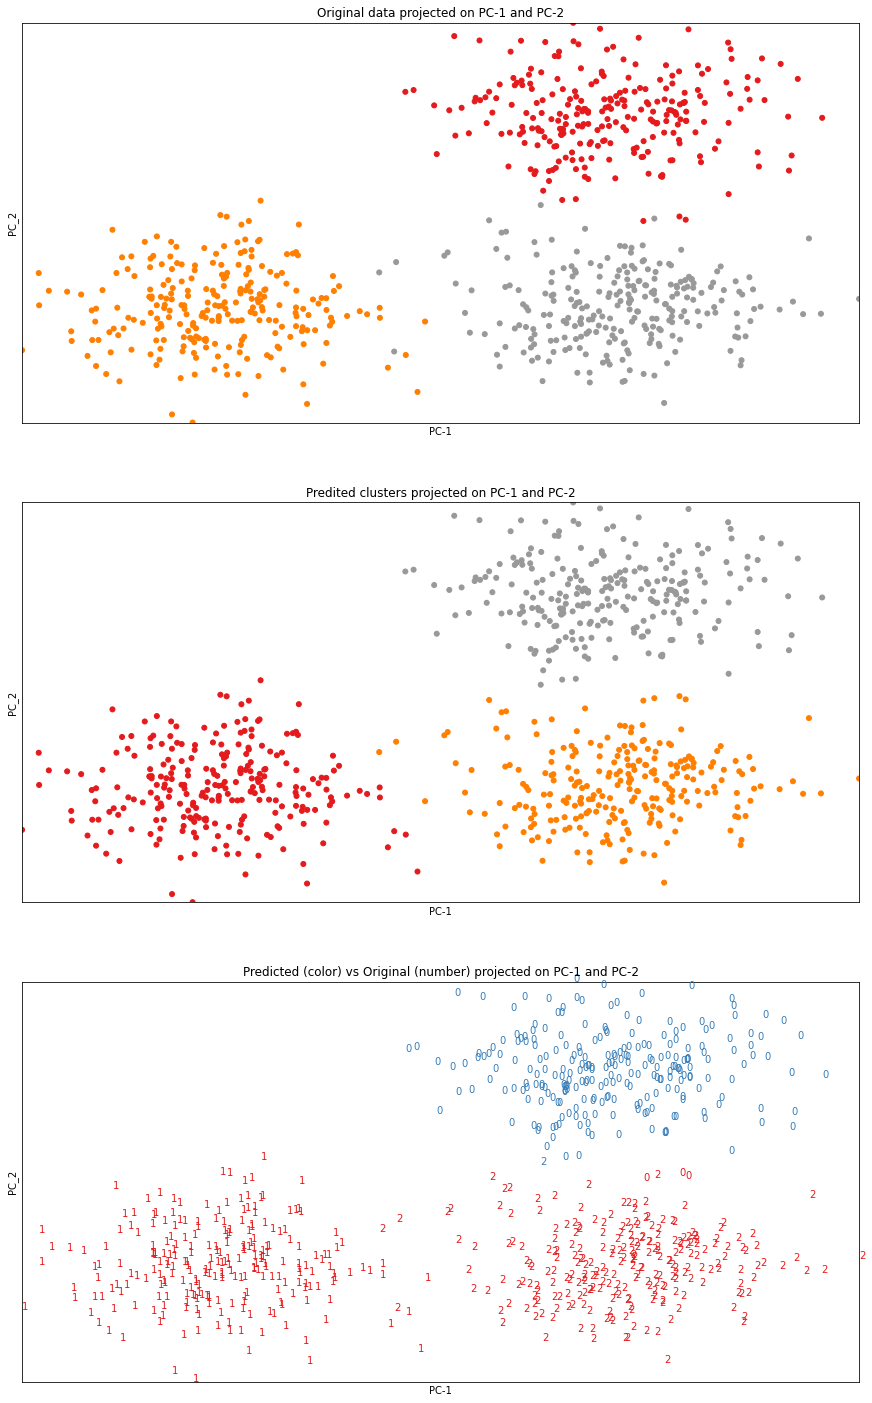

In [12]:
fig = plt.figure(figsize=(15,25))

ax = fig.add_subplot(311)
ax.scatter(X[:, 0], X[:, 1], s=25, c=y , cmap=plt.cm.Set1)
plt.xticks([]), plt.yticks([])
plt.title("Original data projected on PC-1 and PC-2")
ax.set_xlabel("PC-1")
ax.set_ylabel("PC_2")
plt.xlim([np.min(X[:, 0]), np.max(X[:, 0])])
plt.ylim([np.min(X[:, 1]), np.max(X[:, 1])])


ax = fig.add_subplot(312)
ax.scatter(X[:, 0], X[:, 1], s=25, c=clusters , cmap=plt.cm.Set1)
plt.xticks([]), plt.yticks([])
plt.title("Predited clusters projected on PC-1 and PC-2")
ax.set_xlabel("PC-1")
ax.set_ylabel("PC_2")
plt.xlim([np.min(X[:, 0]), np.max(X[:, 0])])
plt.ylim([np.min(X[:, 1]), np.max(X[:, 1])])


ax = fig.add_subplot(313)
for i,c in enumerate(clusters):
    ax.text(X[i,0], X[i,1], y[i], color=plt.cm.Set1(clusters[i]/10.))

plt.xticks([]), plt.yticks([])
plt.title("Predicted (color) vs Original (number) projected on PC-1 and PC-2")
ax.set_xlabel("PC-1")
ax.set_ylabel("PC_2")
plt.xlim([np.min(X[:, 0]), np.max(X[:, 0])])
plt.ylim([np.min(X[:, 1]), np.max(X[:, 1])])

plt.show()